In [71]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [72]:
dataset = pd.read_csv(r'C:\Users\Ab215tx\Desktop\keras-frcnn-master\mot17det_09_final.csv',skiprows=0,header=None)
print(dataset.head())

   0   1     2    3    4    5  6  7        8
0  1   1   260  450  102  262  1  1  1.00000
1  1  19  1686  387  171  345  1  1  1.00000
2  1  20  1886  327  156  404  1  1  0.22293
3  1  21  1253  533   63  129  1  1  1.00000
4  1  22  1292  459   70  202  1  1  0.77624


In [73]:
print(dataset.iloc[320,:])

0     23.0
1     27.0
2    234.0
3    395.0
4     21.0
5    440.0
6      0.0
7      9.0
8      0.0
Name: 320, dtype: float64


In [74]:
dataset.drop(dataset.columns[[6,7,8]], axis=1, inplace=True)
dataset.columns =['Frame','class','x','y','width','height']
print(dataset.head())

   Frame  class     x    y  width  height
0      1      1   260  450    102     262
1      1     19  1686  387    171     345
2      1     20  1886  327    156     404
3      1     21  1253  533     63     129
4      1     22  1292  459     70     202


In [75]:
train = pd.DataFrame(dataset)

In [76]:
print(train.iloc[320,:])

Frame      23
class      27
x         234
y         395
width      21
height    440
Name: 320, dtype: int64


In [77]:
for i in range(len(train)):
    train.iloc[i,0] = "datanew/"+"frame"+str(train.iloc[i,0]-1)+".jpg"
print(train.head())

                Frame  class     x    y  width  height
0  datanew/frame0.jpg      1   260  450    102     262
1  datanew/frame0.jpg     19  1686  387    171     345
2  datanew/frame0.jpg     20  1886  327    156     404
3  datanew/frame0.jpg     21  1253  533     63     129
4  datanew/frame0.jpg     22  1292  459     70     202


In [78]:
print(train.iloc[326,:])

Frame     datanew/frame23.jpg
class                       1
x                         310
y                         450
width                     101
height                    253
Name: 326, dtype: object


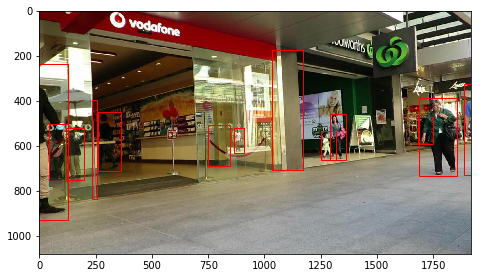

In [42]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('datanew/frame0.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.Frame == "datanew/frame0.jpg"].iterrows():
    x = row.x
    y = row.y
    width = row.width
    height = row.height
    
    #width = xmax - xmin
    #height = ymax - ym
    
    edgecolor = 'r'
    
    # assign different color to different classes of objects
    #if row.class == str(1):
        #edgecolor = 'r'
        #ax.annotate('RBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(19):
        #edgecolor = 'b'
        #ax.annotate('WBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(20):
        #edgecolor = 'g'
        #ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((x,y), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)

In [37]:
train.to_csv(r'C:\Users\Ab215tx\Desktop\keras-frcnn-master\finalannotate.txt', header=None, index=None, sep=',', mode='a')